<h3>Import Basic Libraries</h3>

In [6]:
# Import basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# Import libraries required for timeseries RNN LSTM neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [8]:
# Import KERAS:TimeseriesGenerator
# This class produces time series batches used on training/testing the model

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import KERAS:MinMaxScaler
# This class is used to preprocess (scale) the data

from sklearn.preprocessing import MinMaxScaler

<h3>Data Set: Ross Stores, Inc. (ROST); Time Period:Jan 1, 2020 - Feb 28, 2022</h3>

In [9]:
# Selecting the dataset
dataset_path = "ROSS_STOCK_PREDICTION_01012020-02282022.csv"

In [10]:
# Creating a dataframe called df_ALL

df_ALL = pd.read_csv(dataset_path)

In [11]:
# Load the first five rows

df_ALL.head()

,Date,Close
0,1/2/2020 16:00,116.83
1,1/3/2020 16:00,116.86
2,1/6/2020 16:00,117.43
3,1/7/2020 16:00,118.80
4,1/8/2020 16:00,119.15


<h3>Exploratory Data Analysis (EDA)</h3>

In [12]:
# Count Variables and data points

df_ALL.shape

(544, 2)

In [13]:
# Identify the data types of variables

df_ALL.dtypes

,0
Date,object
Close,float64


In [14]:
# Summary Statistics

df_ALL.describe()

,Close
count,544.000000
mean,107.595239
std,14.565670
min,59.970000
25%,93.867500
50%,112.175000
75%,119.497500
max,132.960000


In [15]:
# Select only the Closing Price for analysis

df = df_ALL.iloc[:,0:2]

In [16]:
df.head()

,Date,Close
0,1/2/2020 16:00,116.83
1,1/3/2020 16:00,116.86
2,1/6/2020 16:00,117.43
3,1/7/2020 16:00,118.80
4,1/8/2020 16:00,119.15


<Axes: >

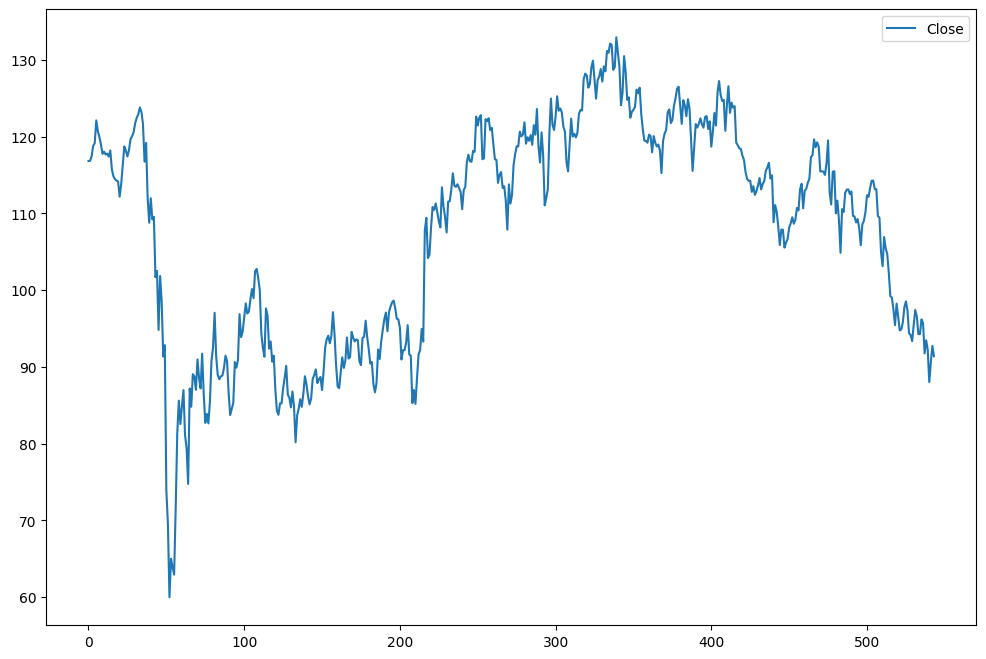

In [17]:
# Plot Closing Price

df.plot(figsize=(12,8))

<h3>Length of Input Time Series - Number of Input Time Steps</h3>

In [18]:
# Set the length of the input sequence
# Here we are using 40 consecutive closing prices to predict the next one

length40 = 40

In [19]:
length40

40

<h3>Time Series Dataset: Train/Test Split</h3>

In [20]:
len(df)

544

In [21]:
# Set percentage of data used for testing, 20% reserved for testing

test_percent = 0.2

In [22]:
# Number of data points reserved for testing the model

len(df)*test_percent

108.80000000000001

In [23]:
# Round the test data points to the nearest decimal

test_length = np.round(len(df)*test_percent)
test_length

109.0

In [24]:
# Index of the testing data

split_index = int(len(df)-test_length)
split_index

435

In [25]:
# Training Dataset, 80% reserved for training data

data_train = df.iloc[: split_index]

# Testing Dataset
# All the indicies from (split_index - length40) to the end of the dataframe
# split_index - length40: Need the last 45 historical data points (belong to data_train) to predict the first data point of the data_test

data_test = df.iloc[split_index - length40 :]


In [26]:
#Load training data first 5 rows
data_train.head()

,Date,Close
0,1/2/2020 16:00,116.83
1,1/3/2020 16:00,116.86
2,1/6/2020 16:00,117.43
3,1/7/2020 16:00,118.80
4,1/8/2020 16:00,119.15


In [27]:
#Load training data last 5 rows
data_train.tail()

,Date,Close
430,9/16/2021 16:00,113.65
431,9/17/2021 16:00,114.62
432,9/20/2021 16:00,113.13
433,9/21/2021 16:00,113.83
434,9/22/2021 16:00,114.19


In [28]:
#Load testing data first 5 rows
data_test.head()

,Date,Close
395,7/28/2021 16:00,121.18
396,7/29/2021 16:00,122.58
397,7/30/2021 16:00,122.69
398,8/2/2021 16:00,121.01
399,8/3/2021 16:00,122.00


In [29]:
#Load testing data last 5 rows
data_test.tail()

,Date,Close
539,2/22/2022 16:00,92.24
540,2/23/2022 16:00,88.02
541,2/24/2022 16:00,90.64
542,2/25/2022 16:00,92.73
543,2/28/2022 16:00,91.39


<h3>Normalize Data (Scale it into the range [0, 1])</h3>

In [30]:
# Create a MinMaxScaler to normalize the data

scaler = MinMaxScaler()

In [31]:
# Train the scaler to perform the normalization (for training data only)

# Select only the 'Close' column for scaling
scaler.fit(data_train[['Close']])

MinMaxScaler()

In [32]:
# Normalize the training dataset

normalized_train = scaler.transform(data_train[['Close']])

# Normalize the testing dataset

normalized_test = scaler.transform(data_test[['Close']])

<h3>Create TimeseriesGenerator for Training</h3>

In [33]:
# TimeseriesGenerator: Generate Time Series batches for training/testing
# Length is 45
# Batch size: Number of time series samples in each batch

batch_size22 = 22

# Creating a TimeseriesGenerator for Training

train_tsGenerator45 = TimeseriesGenerator(normalized_train, normalized_train, length=length40, batch_size=batch_size22)

In [34]:
# Length of the normalized training dataset

len(normalized_train)

435

In [35]:
len(train_tsGenerator45)

18

In [36]:
# Check the first batch

X,y = train_tsGenerator45[0]

In [37]:
print(X)

[[[0.77901082]
  [0.77942184]
  [0.78723113]
  [0.80600082]
  [0.810796  ]
  [0.85162351]
  [0.8323058 ]
  [0.82203042]
  [0.8081929 ]
  [0.7918893 ]
  [0.79572544]
  [0.79065625]
  [0.79230032]
  [0.78695712]
  [0.79791752]
  [0.76435128]
  [0.75188382]
  [0.74681463]
  [0.74393753]
  [0.74270448]
  [0.71544047]
  [0.7379093 ]
  [0.77243458]
  [0.80517879]
  [0.79764351]
  [0.78723113]
  [0.79860255]
  [0.81833128]
  [0.82326346]
  [0.83066173]
  [0.84682833]
  [0.85655569]
  [0.86272092]
  [0.87464036]
  [0.86683107]
  [0.84463625]
  [0.77791478]
  [0.81148102]
  [0.71201534]
  [0.66872174]]

 [[0.77942184]
  [0.78723113]
  [0.80600082]
  [0.810796  ]
  [0.85162351]
  [0.8323058 ]
  [0.82203042]
  [0.8081929 ]
  [0.7918893 ]
  [0.79572544]
  [0.79065625]
  [0.79230032]
  [0.78695712]
  [0.79791752]
  [0.76435128]
  [0.75188382]
  [0.74681463]
  [0.74393753]
  [0.74270448]
  [0.71544047]
  [0.7379093 ]
  [0.77243458]
  [0.80517879]
  [0.79764351]
  [0.78723113]
  [0.79860255]
  [0.818

In [38]:
print (y)

[[0.71256336]
 [0.67474997]
 [0.67940814]
 [0.57158515]
 [0.58281956]
 [0.47732566]
 [0.57377723]
 [0.52870256]
 [0.42992191]
 [0.45019866]
 [0.19125908]
 [0.13138786]
 [0.        ]
 [0.06891355]
 [0.05384299]
 [0.0404165 ]
 [0.15906289]
 [0.29209481]
 [0.35114399]
 [0.30935745]
 [0.34114262]
 [0.36991369]]


<h3>Build, Train, and Test Model</h3></n></n><h3>Build LSTM Model</h3>

In [39]:
# We are using only one feature, i.e., Close Price

n_features = 1

In [40]:
# Define model

model = Sequential()

# Add an LSTM layer
# This layer has 50 LSTM cells
# Activation function: relu

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length40, n_features)))

# Dropout Layer

model.add(Dropout(0.2))

# Add 2nd LSTM layer

model.add(LSTM(units=50, activation='relu', return_sequences=True))

# Dropout Layer

model.add(Dropout(0.2))

# Add 3rd LSTM layer

model.add(LSTM(units=50, activation='relu'))

# Add a fully-connected layer for the final prediction

model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<h3>Compile Model</h3>

In [41]:
# Compile Model

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 40, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 40, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 40, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

<h3>Train (fit) model using fit_generator()</h3>

In [42]:
# Train the model

model.fit(train_tsGenerator45, epochs=50)

Epoch 1/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1:41 6s/step - loss: 0.1822

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.2841
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0729
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0364
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0283
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0214
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0096
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0189
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0105
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0122
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0142
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0243
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0212
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0138
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0072
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0082
Epoch 16/50
18/

<h3>Visualize Model's Performance after Training</h3>

In [43]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<Axes: >

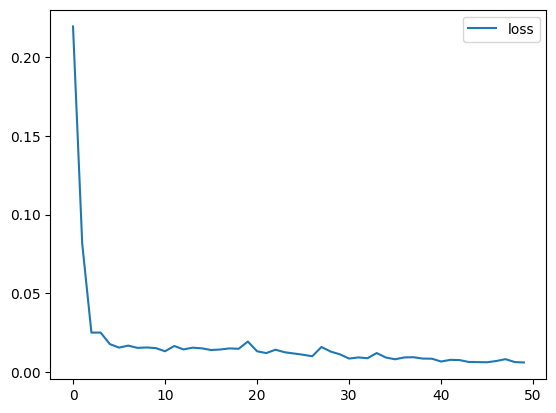

In [44]:
# Load the loss data (model.history.history) into a data frame

ds_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.plot()

ds_model_loss.plot()

<h3>Prediction for Testing: Using TimeseriesGenerator</h3></n></n><h5>Create TimeseriesGenerator for Testing</h5>

In [45]:
# Batch Size is 1

batch_size1 = 1

# Create a TimeseriesGenerator for testing: test_tsGenerator

test_tsGenerator45 = TimeseriesGenerator(normalized_test, normalized_test, length=length40, batch_size=batch_size1)

<h5>Predict Future Data Points for Testing</h5>

In [46]:
normalized_prediction = model.predict(test_tsGenerator45)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [47]:
# Prediction is a numpy 2D array with only one column

normalized_prediction

array([[0.73754406],
       [0.7443119 ],
       [0.75102794],
       [0.75776577],
       [0.76298356],
       [0.7664622 ],
       [0.7643639 ],
       [0.75737333],
       [0.7461833 ],
       [0.7300403 ],
       [0.7081015 ],
       [0.68472147],
       [0.66288114],
       [0.6424875 ],
       [0.625384  ],
       [0.6131959 ],
       [0.6080351 ],
       [0.6101234 ],
       [0.6189679 ],
       [0.6319909 ],
       [0.6469059 ],
       [0.6626065 ],
       [0.6771753 ],
       [0.69076884],
       [0.7035116 ],
       [0.7132722 ],
       [0.7208549 ],
       [0.72674644],
       [0.731532  ],
       [0.73562396],
       [0.7406336 ],
       [0.7465162 ],
       [0.7537974 ],
       [0.7614474 ],
       [0.76929975],
       [0.7763771 ],
       [0.78020036],
       [0.78050935],
       [0.77784705],
       [0.7720618 ],
       [0.76548374],
       [0.76176345],
       [0.7559167 ],
       [0.74613726],
       [0.7368138 ],
       [0.72966003],
       [0.7203151 ],
       [0.710

In [48]:
len(normalized_prediction)

109

In [49]:
# Convert normalized predictions back to the true values

prediction = scaler.inverse_transform(normalized_prediction)

In [50]:
# Flatten all the 2D array

prediction_index = np.arange(435, 544, step=1)
df_prediction = pd.DataFrame(data=prediction,index=prediction_index, columns=['Prediction'])

In [51]:
df_prediction

,Prediction
435,113.803337
436,114.297325
437,114.787529
438,115.279320
439,115.660172
...,...
539,96.211617
540,95.589752
541,94.650085
542,93.607971


<h3>Visualize Prediction</h3>

<Axes: >

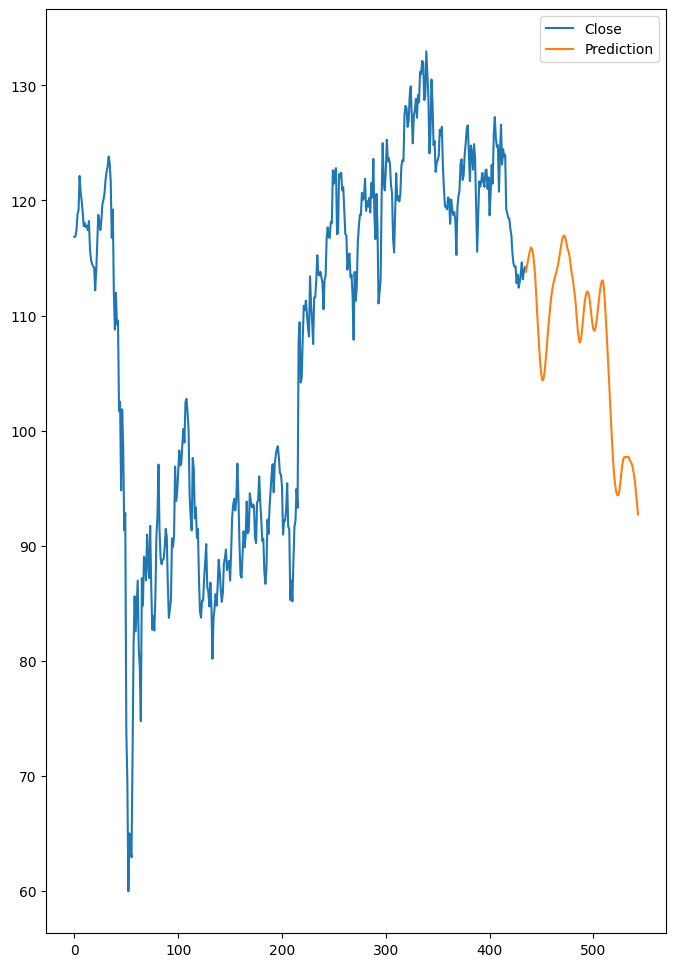

In [52]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Visualize Prediction and Compare Actual Close Price</h3>

<Axes: >

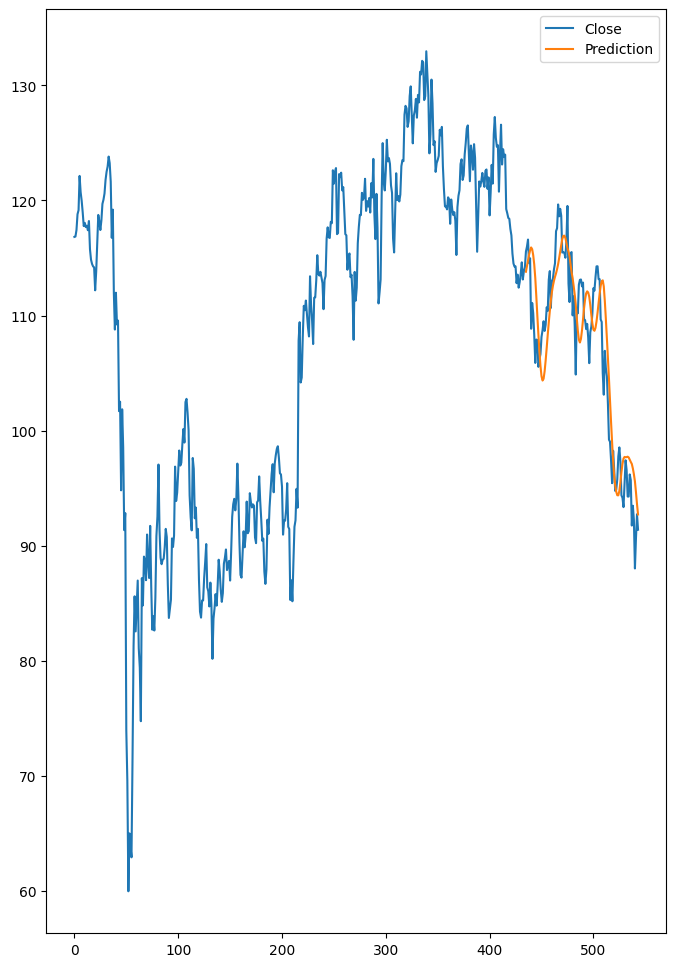

In [53]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Time Series Forecasting with LSTM</h3></n></n><h5>Preprocess Full Input Dataset</h5>

In [54]:
# Using MinMaxScaler to normalize the full dataset df

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df[['Close']])

<h3>Create TimeSeriesGenerator for Forecasting</h3>

In [55]:
# Number of steps of the input timeseries

length40

40

In [56]:
# Create Timeseries Generator for forecasting

forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length40, batch_size=batch_size22)

<h3>Build, Compile, and fit LSTM Model for Forecasting</h3>

In [57]:
# Train/Fit LSTM Model

model.fit(forecast_tsGenerator, epochs = 50)

Epoch 1/50
 3/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0039

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0062
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0045
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0057
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0039
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0064
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0045
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0059
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0060
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0063
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0050
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0047
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0042
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0041
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0058
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0039
Epoch 16/50
23/

<h3>Time Series Forecasting Using LSTM Neural Network </h3>

In [58]:
forecast = []

# Set periods with the time span of forecasting
# Let's forecast for the next 30 business days (03/01/2022-04/11/2022)

periods = 30

first_eval_batch = normalized_full_data[-length40:]
current_batch = first_eval_batch.reshape((1, length40, n_features))

for i in range(periods):

    #get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])

    current_pred = model.predict(current_batch)[0]

    #store prediction

    forecast.append(current_pred)

    # update batch now include prediction and drop first value

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

<h3>Inverse to Transform Normalized Data Back into True Values</h3>

In [59]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[ 93.59079853],
       [ 94.67985473],
       [ 96.18641733],
       [ 97.90930632],
       [ 99.64120094],
       [101.24918775],
       [102.76196727],
       [104.17830395],
       [105.45789872],
       [106.62222149],
       [107.68405853],
       [108.65349003],
       [109.53405734],
       [110.3280967 ],
       [111.0403502 ],
       [111.67242755],
       [112.22943627],
       [112.72046031],
       [113.15191236],
       [113.52399255],
       [113.84451446],
       [114.12016922],
       [114.35781328],
       [114.56411168],
       [114.74635593],
       [114.91021913],
       [115.06240112],
       [115.20659117],
       [115.34841887],
       [115.49313534]])

In [60]:
df

,Date,Close
0,1/2/2020 16:00,116.83
1,1/3/2020 16:00,116.86
2,1/6/2020 16:00,117.43
3,1/7/2020 16:00,118.80
4,1/8/2020 16:00,119.15
...,...,...
539,2/22/2022 16:00,92.24
540,2/23/2022 16:00,88.02
541,2/24/2022 16:00,90.64
542,2/25/2022 16:00,92.73


<h3>Creating new timestamp index with pandas</h3>

In [61]:
# Calculate forecast index

forecast_index = np.arange(544, 574, step=1)

In [62]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index, columns=['Forecast'])
forecast_df

,Forecast
544,93.590799
545,94.679855
546,96.186417
547,97.909306
548,99.641201
549,101.249188
550,102.761967
551,104.178304
552,105.457899
553,106.622221


<h3>Plot the Forecast</h3>

<Axes: >

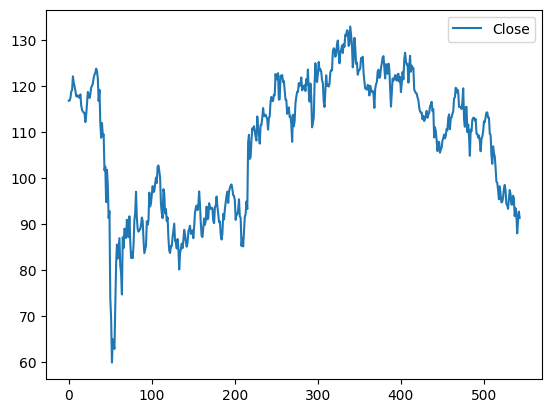

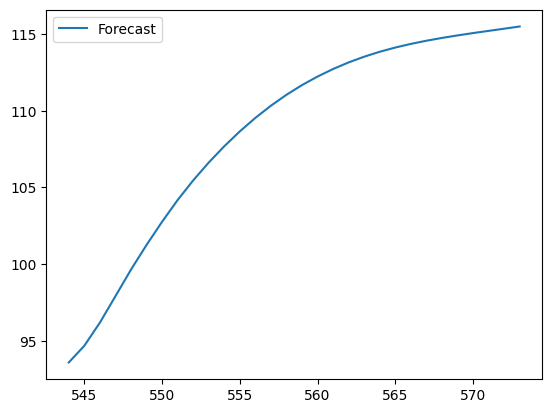

In [63]:
df.plot()
forecast_df.plot()

<h3>Joining Pandas Plots</h3>

<Axes: >

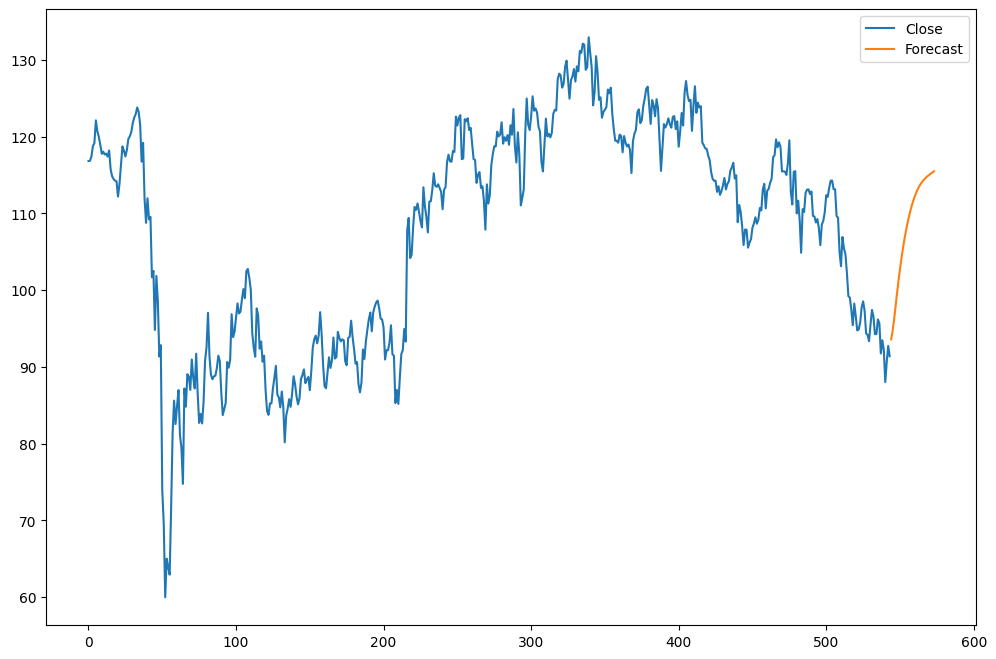

In [64]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(12, 8))

In [65]:
# Selecting the dataset (actual close price)
dir_path_dataset_2 = "ROSS_STOCK_PREDICTION_03012022-04112022.csv"

In [66]:
# Creating a dataframe called df_ALL_MAR_APR_2022
df_ALL_MAR_APR_2022 = pd.read_csv(dir_path_dataset_2)

In [67]:
# Print the first 5 rows of the dataframe
df_ALL_MAR_APR_2022.head()

,Date,Close
0,1/3/2022 16:00,113.16
1,1/4/2022 16:00,113.16
2,1/5/2022 16:00,109.66
3,1/6/2022 16:00,109.44
4,1/7/2022 16:00,104.99


In [68]:
df_ALL_MAR_APR_2022 = df_ALL_MAR_APR_2022.iloc[:,0:2]
df_ALL_MAR_APR_2022

,Date,Close
0,1/3/2022 16:00,113.16
1,1/4/2022 16:00,113.16
2,1/5/2022 16:00,109.66
3,1/6/2022 16:00,109.44
4,1/7/2022 16:00,104.99
...,...,...
539,2/22/2022 16:00,92.24
540,2/23/2022 16:00,88.02
541,2/24/2022 16:00,90.64
542,2/25/2022 16:00,92.73


<Axes: >

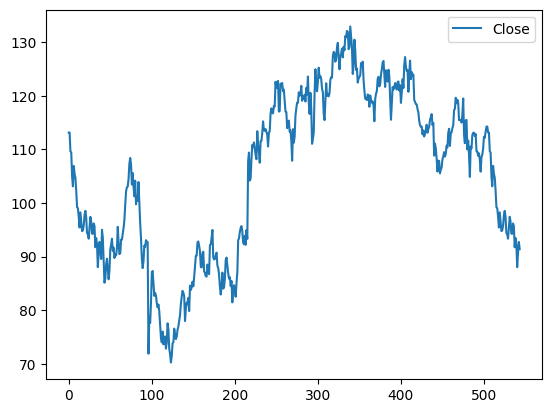

In [69]:
# Plot stock close values
df_ALL_MAR_APR_2022.plot()

In [70]:
forecast_df['Forecast'].values

array([ 93.59079853,  94.67985473,  96.18641733,  97.90930632,
        99.64120094, 101.24918775, 102.76196727, 104.17830395,
       105.45789872, 106.62222149, 107.68405853, 108.65349003,
       109.53405734, 110.3280967 , 111.0403502 , 111.67242755,
       112.22943627, 112.72046031, 113.15191236, 113.52399255,
       113.84451446, 114.12016922, 114.35781328, 114.56411168,
       114.74635593, 114.91021913, 115.06240112, 115.20659117,
       115.34841887, 115.49313534])

<Axes: >

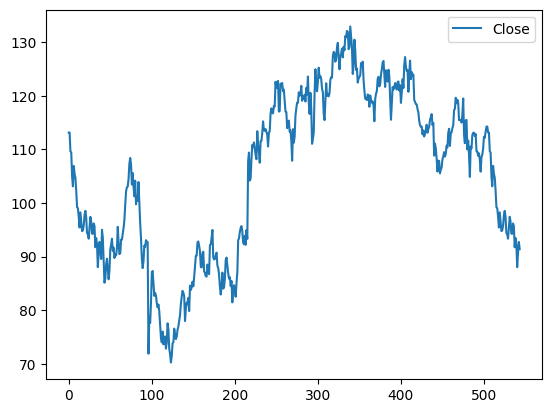

In [71]:
# Plot Actual Close and Forecast
df_ALL_MAR_APR_2022.plot()